In [1]:
import JacksCarRental
import importlib
importlib.reload(JacksCarRental)
jack = JacksCarRental.JacksCarRental()

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

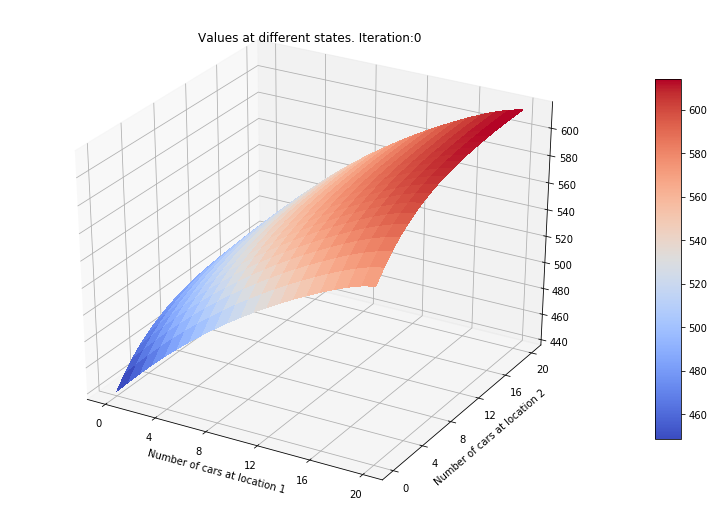

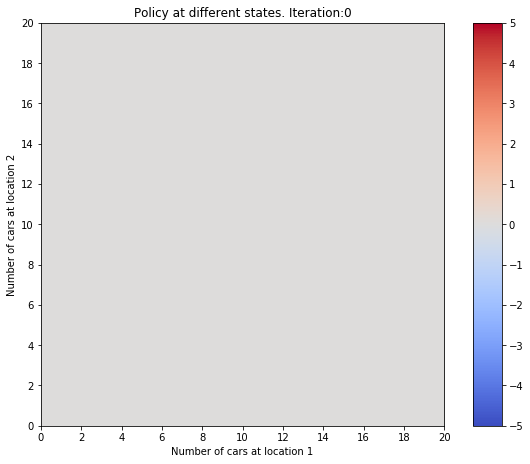

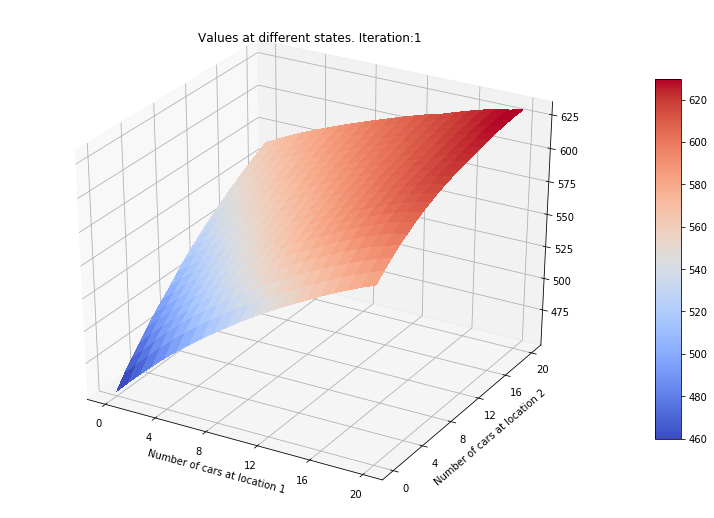

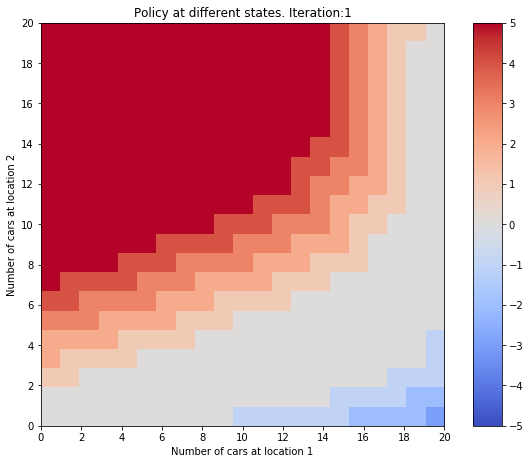

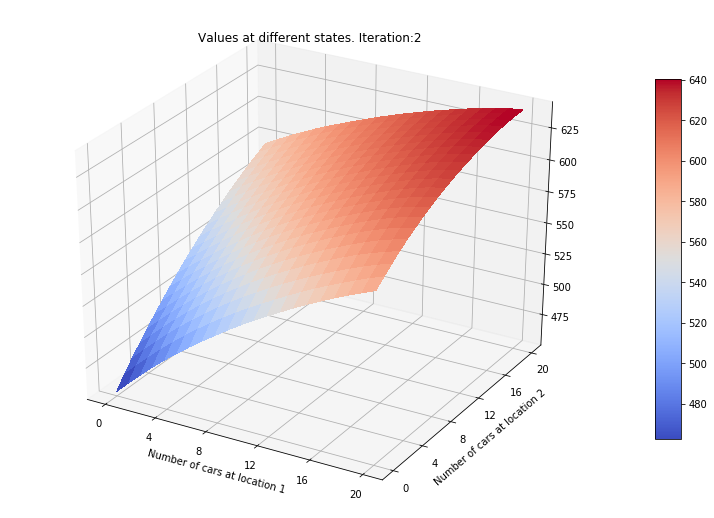

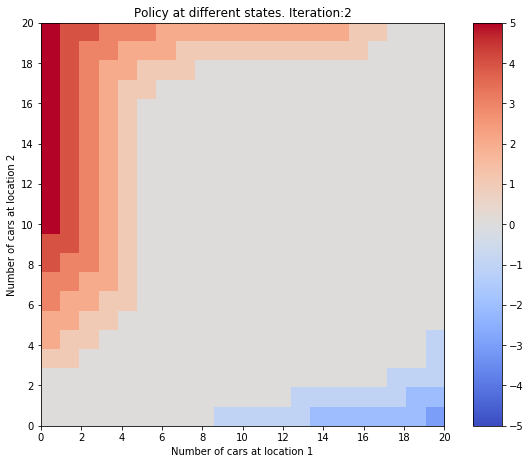

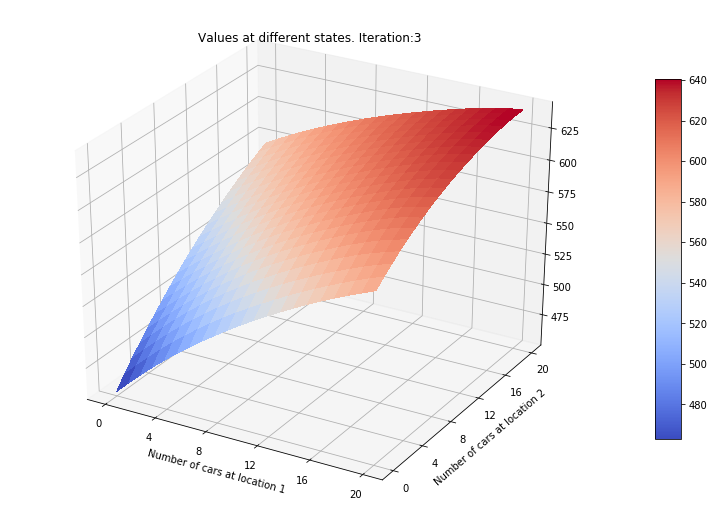

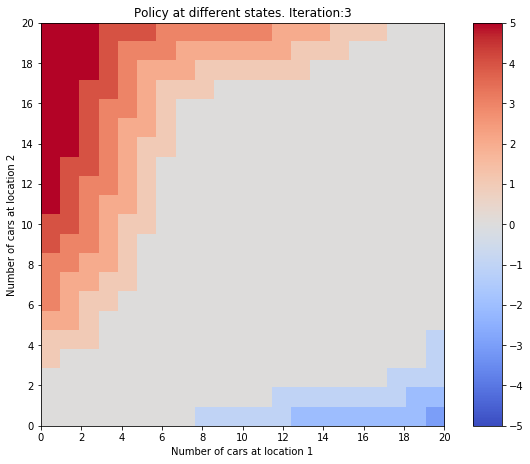

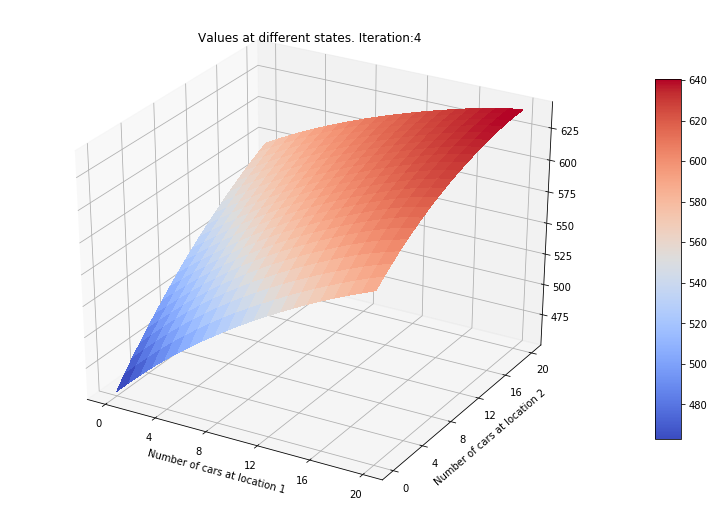

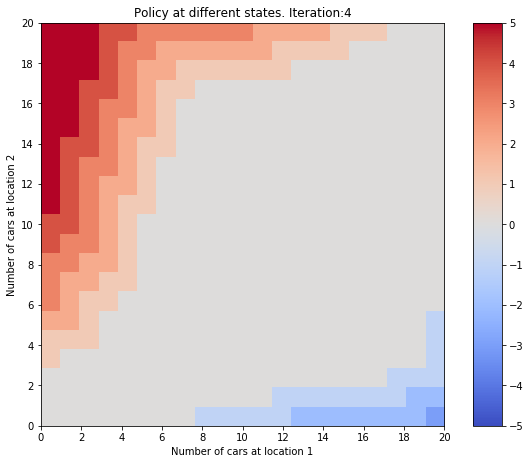

In [6]:
for iter_idx, (V, A) in enumerate(jack.policy_iteration(num_iter_improvement=5, 
                                                        gamma=0.9)):
    # Visualize Value:
    fig = plt.figure(figsize=(12,10))
    ax_surf = fig.gca(projection='3d')
    ax_surf.set_position([0.1,0.15,0.7,0.7])
    X, Y = np.meshgrid(np.arange(0, 21), np.arange(0, 21))
    surf = ax_surf.plot_surface(X, Y, V, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    ax_surf.set_xticks(np.arange(0,21,4).astype(int))
    ax_surf.set_yticks(np.arange(0,21,4).astype(int))
    ax_surf.set_xlabel('Number of cars at location 1')
    ax_surf.set_ylabel('Number of cars at location 2')
    ax_surf.set_title('Values at different states. Iteration:'+str(iter_idx))
    ax_color = fig.add_axes([0.85,0.25,0.03,0.5])
    cbar = fig.colorbar(surf, cax=ax_color, orientation='vertical')
    #plt.savefig('Value.png')
    #plt.close()
    
    # Visualize Policy    
    fig = plt.figure(figsize=(8,8))
    ax_image = fig.add_axes([0.1,0.15,0.7,0.7])
    ax_color = fig.add_axes([0.85,0.15,0.05,0.7])
    image = ax_image.imshow(A[::-1,:], 
                            cmap=cm.coolwarm,
                            extent=[0, 20, 0, 20])
    ax_image.set_xticks(np.arange(0,21,2).astype(int))
    ax_image.set_yticks(np.arange(0,21,2).astype(int))
    ax_image.set_xlabel('Number of cars at location 1')
    ax_image.set_ylabel('Number of cars at location 2')
    ax_image.set_title('Policy at different states. Iteration:'+str(iter_idx))
    image.set_clim(vmin=-5, vmax=5)
    cbar = fig.colorbar(image, cax=ax_color, 
                        ticks=[-5,-4,-3,-2,-1,0,1,2,3,4,5],
                        orientation='vertical')
    
    #plt.savefig('Policy.png')
    plt.show()